# Dataset
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem
(recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google
Street View images.

# Acknowledgement
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural
Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature
Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

#Load necessary libraries

In [68]:
import tensorflow as tf
import h5py
import numpy as np
import matplotlib.pyplot as plt


# Read h5 file

In [69]:
data = h5py.File('/content/drive/MyDrive/glearn/INN-DL/SVHN_single_grey1.h5','r')

In [70]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# Form train, test and validation splits

In [71]:
X_train = data['X_train'][:]
y_train = data['y_train'][:]

X_val = data['X_val'][:]
y_val = data['y_val'][:]

X_test = data['X_test'][:]
y_test = data['y_test'][:]

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


There are 42,000 training images and 18000 each in validation and test sets. 

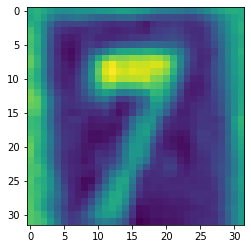

In [73]:
plt.imshow(X_train[2])

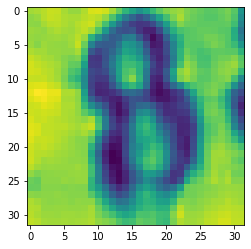

In [74]:
plt.imshow(X_test[10])

# Reshape and Normalize the data

In [75]:
# reshape the data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1) 
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1) 

In [76]:
# Normalizing the Data
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

# One hot encode the labels for train, validation test sets 

In [77]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [78]:
y_train[1], y_test[1], y_val[1]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

# Build the graph

In [79]:
tf.keras.backend.clear_session() # clear any previous sessions

In [80]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(600, activation='relu'))

#Add dropout layer
model.add(tf.keras.layers.Dropout(0.20))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(400, activation='relu'))

#Add dropout layer
model.add(tf.keras.layers.Dropout(0.10))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [81]:
# Fitting model
history = model.fit(x=X_train, y=y_train, batch_size=100, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
420/420 [==============================] - 14s 34ms/step - loss: 1.5206 - accuracy: 0.4908 - val_loss: 0.9543 - val_accuracy: 0.6991
Epoch 2/50
420/420 [==============================] - 14s 33ms/step - loss: 0.9936 - accuracy: 0.6832 - val_loss: 0.7859 - val_accuracy: 0.7505
Epoch 3/50
420/420 [==============================] - 14s 34ms/step - loss: 0.8488 - accuracy: 0.7312 - val_loss: 0.6615 - val_accuracy: 0.7930
Epoch 4/50
420/420 [==============================] - 14s 34ms/step - loss: 0.7657 - accuracy: 0.7586 - val_loss: 0.6169 - val_accuracy: 0.8044
Epoch 5/50
420/420 [==============================] - 15s 35ms/step - loss: 0.7028 - accuracy: 0.7774 - val_loss: 0.5569 - val_accuracy: 0.8259
Epoch 6/50
420/420 [==============================] - 15s 36ms/step - loss: 0.6509 - accuracy: 0.7940 - val_loss: 0.5211 - val_accuracy: 0.8379
Epoch 7/50
420/420 [==============================] - 16s 38ms/step - loss: 0.6136 - accuracy: 0.8046 - val_loss: 0.5082 - val_accuracy:

# Vizualizing accuracy and loss

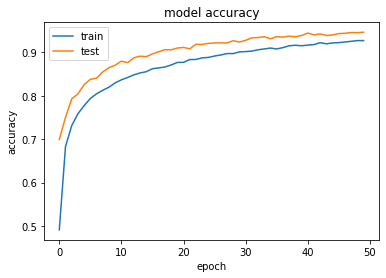

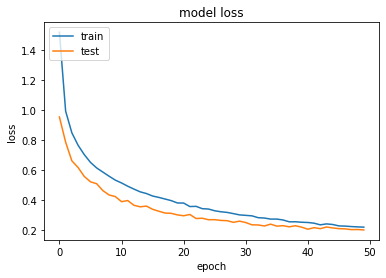

In [82]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 600)               615000    
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0

# Save the model

In [84]:
model.save('svhn_v2.h5')

# Evaluate the model

In [85]:
#Evaluating model on test data
model.evaluate(X_val,y_val)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1996 - accuracy: 0.9467


[0.199570432305336, 0.9466833472251892]

The validation set loss is 0.1996 and accuracy is 94.67%.

In [86]:
#Evaluating model on test data
model.evaluate(X_test,y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.4868 - accuracy: 0.8710


[0.48683464527130127, 0.8709999918937683]

The production loss ( test set) is 0.4868 and accuracy is 87.1%. 

In [87]:
model.predict(X_test), model.predict(X_val)

(array([[8.8690557e-02, 8.0177850e-01, 1.4979437e-03, ..., 3.1170915e-04,
         1.1445540e-02, 3.0656431e-03],
        [1.5577858e-06, 2.7386625e-06, 3.0441474e-02, ..., 9.6942061e-01,
         2.0197993e-07, 2.2742624e-06],
        [9.1802980e-07, 7.1816976e-06, 9.9997258e-01, ..., 1.5390683e-06,
         1.0393655e-06, 2.3745515e-07],
        ...,
        [1.5604428e-08, 7.4110153e-06, 1.3278066e-07, ..., 9.9998546e-01,
         1.8690303e-09, 8.6406549e-10],
        [5.3288965e-03, 7.9648351e-05, 1.3004376e-04, ..., 6.8437727e-03,
         1.0622744e-02, 9.3421865e-01],
        [3.4373694e-05, 3.2690121e-05, 9.9961877e-01, ..., 9.4186880e-06,
         5.7728685e-06, 4.6853103e-07]], dtype=float32),
 array([[9.9996281e-01, 1.3689197e-06, 3.2316476e-07, ..., 4.4191170e-06,
         5.1881392e-07, 1.7785549e-05],
        [9.9989879e-01, 7.9273690e-07, 1.2564643e-06, ..., 5.2338881e-05,
         1.2995331e-07, 3.0795185e-05],
        [9.9993742e-01, 1.0634298e-05, 7.1243727e-07, ...,

In the above demo, we treated X_train as the training set and X_val as the validation and X_test was used as the production data/unseen data and we were able to build a dense neural network that performed decently on unseen data although the accuracy for production data was lower than validation data. 

The training and validation loss seem to tread closely which suggests the model learnt well. Although in case of production data, the model didn't perform at the same level. More layers could be added, parameters finetuned and tried with different variants so that it gives better results in the future. 